### Task 1. Data Analysis.  

• CRIM - per capita crime rate by town  
• ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
• INDUS - proportion of non-retail business acres per town.  
• CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
• NOX - nitric oxides concentration (parts per 10 million)  
• RM - average number of rooms per dwelling  
• AGE - proportion of owner-occupied units built prior to 1940  
• DIS - weighted distances to five Boston employment centres  
• RAD - index of accessibility to radial highways  
• TAX - full-value property-tax rate per $10,000  
• PTRATIO - pupil-teacher ratio by town  
• B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
• LSTAT - % lower status of the population  
• MEDV - Median value of owner-occupied homes in $1000's  

##### Importing pandas and creating dataframe

In [34]:
import pandas as pd


main_df = pd.read_csv('BostonHousing.csv')

##### Showing dataframe

In [35]:
main_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### Creating basic profiling and checking on duplicates

In [36]:
main_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [38]:
main_df.size > main_df.drop_duplicates().size

False

##### Creating correlation matrix

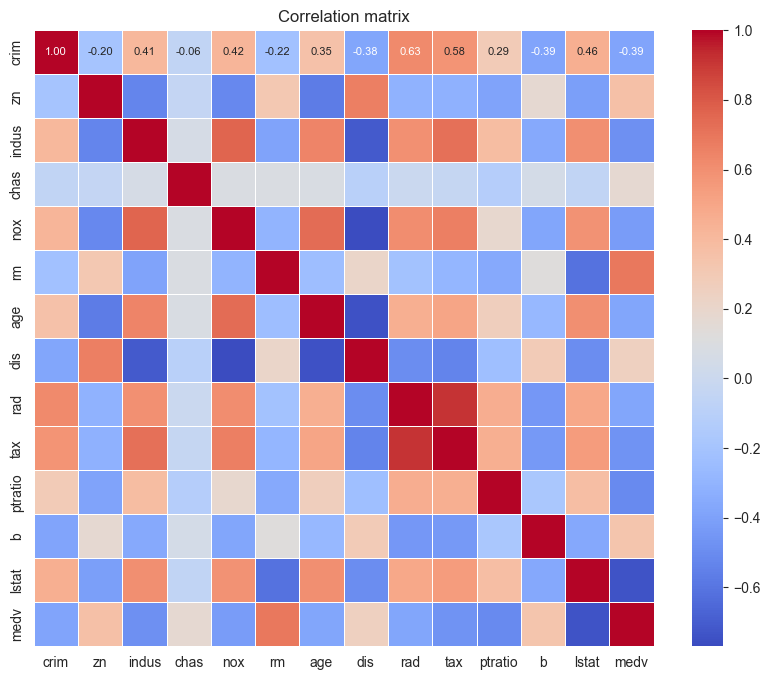

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(main_df.corr(), cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 8}, annot=True)
plt.title('Correlation matrix')
plt.show()

##### Creating linear regression to find dependency on number of rooms and cost

Coefficients: [9.34830141]
Intercept: -36.24631889813792


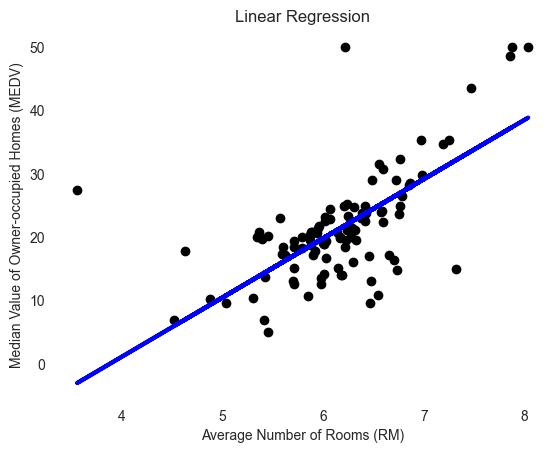

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X = main_df[['rm']]
y = main_df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV)')
plt.title('Linear Regression')
plt.show()

##### Making quantiles to check deviations in medv

In [41]:
quantile_one = main_df['medv'].quantile(0.25)
quantile_two = main_df['medv'].quantile(0.5)
quantile_three = main_df['medv'].quantile(0.75)

iqr = quantile_three - quantile_one

iqr

7.975000000000001

In [42]:
quantile_one

17.025

In [43]:
quantile_two

21.2

In [44]:
quantile_three

25.0

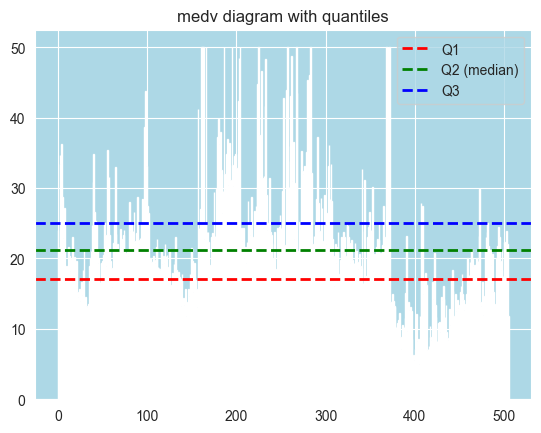

In [58]:
plt.bar(range(len(main_df['medv'])), main_df['medv'])
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.axhline(quantile_one, color='r', linestyle='--', linewidth=2, label='Q1')
plt.axhline(quantile_two, color='g', linestyle='--', linewidth=2, label='Q2 (median)')
plt.axhline(quantile_three, color='b', linestyle='--', linewidth=2, label='Q3')
plt.legend()
plt.title('medv diagram with quantiles')
plt.show()

##### Calculating 